In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
import cv2

# Exercice 1 : Régression avec un Réseau de Neurones Simple
## Objectif : 
 * Prendre en main PyTorch
 * Illustrer le théorème de l'approximation universelle
## Étapes
 * Définition du Réseau : Un réseau avec une seule couche cachée.
 * Entraînement pour Fitter une fonction : Entraîner le réseau pour approximer une fonction simple.
 * Test des Capacités d'Extrapolation 
 
 Prenez le code ci-dessous comme base et tentez de modifier les hyperparametres et l'architecture pour obtenir un résultat satisfaisant

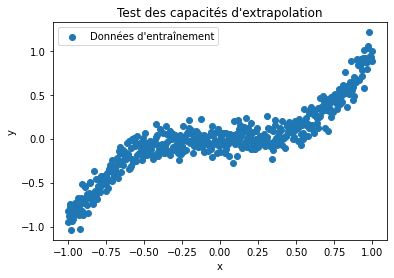

In [21]:
# Générer des données
np.random.seed(0)
x = np.linspace(-1, 1, 500)
y = x**3 + np.random.normal(0, 0.1, size=x.shape)  # Fonction cubique avec bruit


plt.scatter(x, y, label='Données d\'entraînement')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test des capacités d\'extrapolation')
plt.legend()
plt.show()

# Convertir en tenseurs PyTorch
x_tensor = torch.from_numpy(x).float().unsqueeze(1)
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

In [23]:
# Définir le réseau, la loss et l'optimizer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 10)
        self.output = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

model = SimpleNN()
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [24]:
# Entraînement
epochs = 1000
for epoch in range(epochs):
    model.train() # met en mode "entrainement le modele", active des comportements specifiques pour des techniques comme le dropout etc
    optimizer.zero_grad() # reinitialise les gradients (evite d'accumuler les gradients des epochs précédentes)
    outputs = model(x_tensor) # forward pass
    loss = loss_function(outputs, y_tensor)
    loss.backward() # backward pass : les gradients sont calculés et seront utilisés à la ligne suivante
    optimizer.step() # mise a jour des poids et biais

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')


Epoch [0/1000], Loss: 0.3580
Epoch [100/1000], Loss: 0.1829
Epoch [200/1000], Loss: 0.1316
Epoch [300/1000], Loss: 0.1089
Epoch [400/1000], Loss: 0.0945
Epoch [500/1000], Loss: 0.0836
Epoch [600/1000], Loss: 0.0748
Epoch [700/1000], Loss: 0.0677
Epoch [800/1000], Loss: 0.0619
Epoch [900/1000], Loss: 0.0572


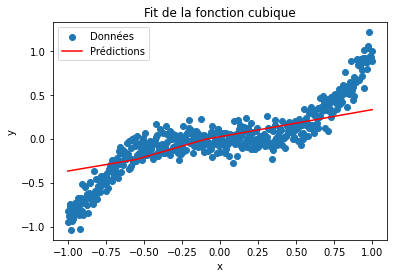

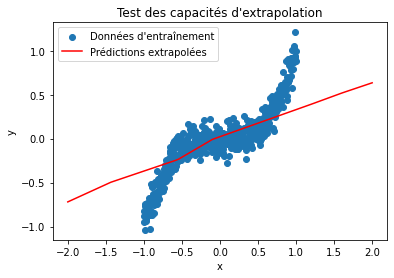

In [25]:
# Visualisation des résultats
model.eval()
with torch.no_grad():
    predictions = model(x_tensor).numpy()

plt.scatter(x, y, label='Données')
plt.plot(x, predictions, label='Prédictions', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fit de la fonction cubique')
plt.legend()
plt.show()

# Test des capacités d'extrapolation
x_test = np.linspace(-2, 2, 100)
x_test_tensor = torch.from_numpy(x_test).float().unsqueeze(1)
with torch.no_grad():
    predictions_test = model(x_test_tensor).numpy()

plt.scatter(x, y, label='Données d\'entraînement')
plt.plot(x_test, predictions_test, label='Prédictions extrapolées', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test des capacités d\'extrapolation')
plt.legend()
plt.show()

# Exercice 2 : Illustration du Spectral Bias
## Objectif
 * Illustrer le biais spectral des réseaux de neurones
## Étapes
* Définir une Fonction avec Différentes Échelles : Fonction composée de termes de basse et haute fréquence.
* Entraîner un Réseau de Neurones : Visualiser le fit au cours des époques.

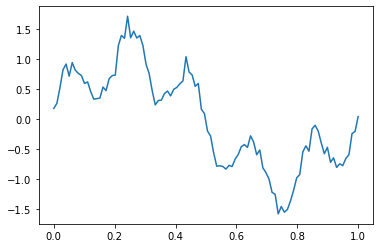

In [27]:
# Générer des données
np.random.seed(0)
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x) + 0.5 * np.sin(10 * np.pi * x) + np.random.normal(0, 0.1, size=x.shape)

plt.plot(x,y)
plt.show()

# Convertir en tenseurs PyTorch
x_tensor = torch.from_numpy(x).float().unsqueeze(1)
y_tensor = torch.from_numpy(y).float().unsqueeze(1)


In [ ]:
# sur le modele de SimpleNN, définir un réseau dense plus profond (3 ou 4 couches)
#class DenseNN(nn.Module):
#    def __init__(self):
#        super(DenseNN, self).__init__()
#        ...

# RCreer le modele, definir la loss function et l'optimizer
model = DenseNN()
#loss_function = 
#optimizer = 

# Entraînement et visualisation du fit au cours des époques
epochs = 1000
loss_history = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    # a completer

    if epoch % 500 == 0:
        model.eval()
        with torch.no_grad():
            predictions = model(x_tensor).numpy()
        plt.figure()
        plt.scatter(x, y, label='Données')
        plt.plot(x, predictions, label='Prédictions', color='r')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Fit au cours des époques: {epoch}')
        plt.legend()
        plt.show()

plt.figure()
plt.semilogy(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Historique de la loss')
plt.show()

# Exercice 3 : Early Stopping avec un Set de Validation
## Objectif
* Illustrer l'utilisation d'un set de validation et le monitoring de la loss
* Utiliser le dataloader pytorch
## Étapes
* Diviser les Données en Train et Validation Sets.
* Entraîner un Réseau de Neurones : Surveiller la perte de validation et déterminer l'early stopping.

In [ ]:
# Générer des données
np.random.seed(0)
torch.manual_seed(0)
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x) + 0.5 * np.sin(10 * np.pi * x) + np.random.normal(0, 0.5, size=x.shape)

# Convertir en tenseurs PyTorch
x_tensor = torch.from_numpy(x).float().unsqueeze(1)
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

In [ ]:
# Créer un dataset PyTorch
dataset = TensorDataset(x_tensor, y_tensor)

# Diviser le dataset en ensembles d'entraînement et de validation
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Créer des DataLoaders pour les ensembles d'entraînement et de validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
 # creer model, loss et optimizer

# Entraînement avec early stopping
epochs = 15000
train_loss_history = []
val_loss_history = []
best_val_loss = float('inf') # stocker la meilleur validation loss grace a cette variable
early_stopping_epoch = 0 # la meilleur epoch pour la validation loss est stockée dans cette variable

for epoch in range(epochs):
    # Entraînement
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        # a completer
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_loss_history.append(train_loss)
    
    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        # a completer
    
    if val_loss < best_val_loss:
        # a completer
    
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


In [ ]:
plt.figure()
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.axvline(early_stopping_epoch, color='r', linestyle='--', label='Early Stopping Point')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Early Stopping Monitoring')
plt.legend()
plt.show()

# Exercice 4 : CNN
## Objectif
 * prendre en main les conv nets dans pytorch
 * construire un modèle simple pour trouver le centre d'un cercle sur une image

In [ ]:
def generate_circle_images(num_samples, img_size):
    # Initialiser les tableaux pour les images et les étiquettes
    X = np.zeros((num_samples, img_size, img_size))
    y = np.zeros((num_samples, 2))
    
    for i in range(num_samples):
        # Générer des rayons et des centres aléatoires pour les cercles
        radius = np.random.randint(5, 15)
        center_x = np.random.randint(radius, img_size - radius)
        center_y = np.random.randint(radius, img_size - radius)
        
        # Créer une image de taille img_size x img_size
        img = np.zeros((img_size, img_size), dtype=np.uint8)
        # Dessiner un cercle dans l'image
        cv2.circle(img, (center_x, center_y), radius, 255, -1)
        
        # Stocker l'image et les coordonnées du centre
        X[i] = img
        y[i] = np.array([center_x, center_y])
    
    # Normaliser les images pour que les valeurs soient entre 0 et 1
    X = X / 255.0
    # Ajouter une dimension pour les canaux (1 canal pour les images en niveaux de gris)
    X = np.expand_dims(X, axis=1)
    return X, y

num_samples = 1000  # Nombre d'images à générer
img_size = 32  # Taille de chaque image (img_size x img_size)
X, y = generate_circle_images(num_samples, img_size)

In [ ]:
# Convertir les données numpy en tenseurs PyTorch
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Première couche de convolution
        self.conv1 = nn.Conv2d(
            in_channels=1,  # Nombre de canaux d'entrée (1 pour les images en niveaux de gris)
            out_channels=16,  # Nombre de filtres de sortie
            kernel_size=3,  # Taille des filtres (3x3)
            padding=1  # Padding pour garder la taille de l'image constante
        )
        
        # Couche de pooling
        self.pool = nn.MaxPool2d(
            kernel_size=2,  # Taille de la fenêtre de pooling (2x2)
            stride=2,  # Stride de la fenêtre de pooling
            padding=0  # Pas de padding
        )
        
        # Deuxième couche de convolution
        self.conv2 = nn.Conv2d(
            in_channels=16,  # Nombre de canaux d'entrée (16 de la première couche)
            out_channels=32,  # Nombre de filtres de sortie
            kernel_size=3,  # Taille des filtres (3x3)
            padding=1  # Padding pour garder la taille de l'image constante
        )
        
        # Couche entièrement connectée
        self.fc1 = nn.Linear(
            in_features=32 * 8 * 8,  # Nombre de caractéristiques d'entrée (32 canaux * 8x8 dimension de l'image)
            out_features=128  # Nombre de neurones de la couche cachée
        )
        
        # Couche de sortie
        self.fc2 = nn.Linear(
            in_features=128,  # Nombre de caractéristiques d'entrée (128 de la couche précédente)
            out_features=2  # Nombre de neurones de sortie (coordonnées x et y du centre du cercle)
        )
    
    def forward(self, x):
        # Passer l'entrée à travers la première couche de convolution suivie de ReLU et de pooling
        x = self.pool(torch.relu(self.conv1(x)))
        # Passer l'entrée à travers la deuxième couche de convolution suivie de ReLU et de pooling
        x = # a completer
        # Aplatir la sortie des convolutions pour l'entrée dans les couches entièrement connectées
        x = x.view(-1, 32 * 8 * 8)
        # Passer par la première couche entièrement connectée suivie de ReLU
        x = # a completer
        # Passer par la couche de sortie
        x = # a completer
        return x

In [ ]:

model = ConvNet()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraînement du réseau
epochs = 100
batch_size = 32

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_tensor.size()[0])
    
    for i in range(0, X_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_tensor[indices], y_tensor[indices]
        
        # a completer
    
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')



In [ ]:
# Tester le réseau
model.eval()
test_img, test_label = generate_circle_images(1, img_size)
test_img_tensor = torch.from_numpy(test_img).float()

with torch.no_grad():
    prediction = model(test_img_tensor).numpy()

test_img = test_img.squeeze() * 255
pred_x, pred_y = int(prediction[0][0]), int(prediction[0][1])

plt.imshow(test_img, cmap='gray')
plt.scatter([pred_x], [pred_y], color='red', label='Predicted Center')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Détection du centre d\'un cercle')
plt.legend()
plt.show()